In [51]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, datasets, models

In [52]:
(X_train , y_train) , (X_test , y_test)= datasets.cifar10.load_data()

In [53]:
X_train.shape

(50000, 32, 32, 3)

In [54]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

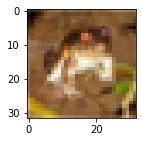

In [55]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [56]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [57]:
y_train = y_train.reshape(-1 , )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
classes = ["airplane" , "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

In [58]:
def plot_sample(X, y , index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

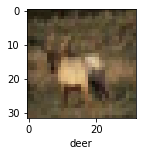

In [29]:
plot_sample(X_train, y_train , 3)

## Normalization

In [62]:
X_test_s = X_test/255
X_train_s = X_train/255
y_test_s = y_test/255
y_train_s = y_train/255

In [39]:
ann = models.Sequential([
    layers.Flatten(input_shape =(32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10 , activation = 'sigmoid')

])



In [ ]:
ann.compile(optimizer = 'SGD',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
ann.fit(X_train_s , y_train_s , epochs = 5)

In [41]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 23s 20ms/step - loss: 1.0890e-04 - accuracy: 0.1000


[0.00010889828263316303, 0.10000000149011612]

## Accuracy is not good , lets try CNN

In [64]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    #ann
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(10 , activation = 'softmax')
    ])

In [ ]:
cnn.compile(optimizer = 'SGD',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
cnn.fit(X_train , y_train , epochs = 10)

In [ ]:
cnn.evaluate(X_test , y_test , 1)

In [66]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.9999619e-01, 1.4065134e-06, 3.1735830e-08, 7.0049353e-08,
        3.7462141e-07, 3.9954049e-08, 1.6912199e-07, 1.6396157e-06,
        7.9336658e-08, 5.7090780e-08],
       [9.9999988e-01, 5.8233002e-08, 2.9720928e-10, 1.2997450e-09,
        3.7646832e-09, 6.3418981e-10, 1.4643055e-09, 4.7138915e-08,
        1.0713211e-09, 7.8755058e-10],
       [9.9999952e-01, 2.2852792e-07, 1.9997697e-09, 8.0418898e-09,
        2.9825838e-08, 3.1548342e-09, 1.1937009e-08, 1.9987172e-07,
        5.3221001e-09, 4.8499240e-09],
       [9.9999988e-01, 4.0400117e-08, 2.7166042e-10, 9.2072061e-10,
        5.3540115e-09, 4.2303314e-10, 1.6437774e-09, 3.7190230e-08,
        7.3544287e-10, 5.4870525e-10],
       [9.9999285e-01, 2.6670439e-06, 6.8154854e-08, 1.5317654e-07,
        8.6121599e-07, 7.9381806e-08, 2.8095587e-07, 2.8114903e-06,
        1.4945994e-07, 1.3252811e-07]], dtype=float32)

In [ ]:
y_test = y_test.reshape(-1 , )
plot_sample(X_test , y_test , 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [70]:
np.argmax([5,12,100,3])

2

In [ ]:
np.argmax(y_pred[0])

In [ ]:
y_classes = [np.argmax(element) for element in y_pred] 
y_classes[:5]

In [ ]:
plot_sample(X_test, y_test , 1)

In [ ]:
classes[y_classes[1]]

In [ ]:
print("Classification Report :\n" , classification_report(y_test, y_classes))

In [ ]:
https://www.youtube.com/watch?v=7HPwo4wnJeA&ab_channel=codebasics